** cabocha インストール (ubuntu。うまくいった) **
一番参考になったのは
https://qiita.com/nezuq/items/f481f07fc0576b38e81d

- CRF++を普通にmakeしてインストールする
- CRF++を
https://y-uti.hatenablog.jp/?page=1473492021
に従って、ldconfigを行って認識させる
sudo ldconfig
- cabochaをビルド。この際に
https://qiita.com/nezuq/items/f481f07fc0576b38e81d
に従って、configureは以下のとおりにやる
./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8 --with-posset=juman

- sudo -iしたあと、ソースのディレクトリ以下のに入り、
　　　/home/ユーザー名/anaconda3/bin/python ./setup.py install
　のようにする。(pythonを直に指定しないとrootが優先して使うシステムのpythonを呼びに行ってしまう）


** CaboChaインストール (windows.まだうまくいっていない)**

- 32bit版のpythonのcondaenvを作成。activateしたときにmecabとcabochaのbinがpathに追加されるように設定
- 32bit版のMecabをインストール（必ずCaboChaインストール前に上記のpathを通すことを含めてやる）
- CaboChaのexeからインストール（32bitのcondaenvをactivateしたうえで行う）
- 公式バインディングは評判も悪いし、インストールがそもそもできないのでbindingを使う（？）
VS community version を入れればよい？==>うまくいかず
http://isiz.hateblo.jp/entry/2015/08/22/Python%E3%81%A7Unable_to_find_vcvarsall.bat%E3%81%A8%E8%A8%80%E3%82%8F%E3%82%8C%E3%82%8B%E9%9A%9B%E3%81%AE%E3%81%BE%E3%81%A8%E3%82%81

Visual c++　2015 build tool?
https://blog.ionelmc.ro/2014/12/21/compiling-python-extensions-on-windows/




https://github.com/kenkov/cabocha

https://musaprg.hatenablog.com/entry/2018/02/09/005510


https://teratail.com/questions/80487


以下検証中:

https://qiita.com/mima_ita/items/161cd869648edb30627b

https://teratail.com/questions/80487


https://hayataka2049.hatenablog.jp/entry/2018/03/23/075140


In [1]:
import CaboCha


In [2]:
import codecs

** 基本的な使い方 **

https://qiita.com/nezuq/items/f481f07fc0576b38e81d

In [3]:
c = CaboCha.Parser()

In [4]:
tmp2 = (c.parse(u'吾輩は猫である。名前は、まだない。'))

In [5]:
print(tmp2.toString(CaboCha.FORMAT_LATTICE))


* 0 1D 0/1 0.708798
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 3D 3/3 -1.131290
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
* 2 3D 2/2 -1.131290
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 3 -1D 2/2 0.000000
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
ない	形容詞,自立,*,*,形容詞・アウオ段,基本形,ない,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS



In [6]:
print(c.parseToString(u'吾輩は猫である。名前は、まだない'))

    吾輩は-D    
  猫である。---D
      名前は、-D
        まだない
EOS



In [33]:
tmp = c.parse(u'吾輩は猫である。名前はまだない。')

In [37]:
c.parseToString?

** 0. 形態素を表すクラスMorphを実装せよ．**

このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ 

In [7]:
fname_parsed = '/home/toshinao/PycharmProjects/keras_sandbox/nlp100data/neko.txt.cabocha'
neko_file_dir = '/home/toshinao/PycharmProjects/keras_sandbox/nlp100data/neko.txt'

In [8]:
with codecs.open(neko_file_dir , "r" , 'utf-8') as rf ,\
    codecs.open(fname_parsed , 'w' , 'utf-8') as wf:
    c = CaboCha.Parser()
    for l in rf:
        wf.write(c.parse(l).toString(CaboCha.FORMAT_LATTICE))

In [9]:
class Morph:
    def __init__(self , surface ,base , pos , pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    def __str__(self):
        return ('surface[{}]\tbase[{}]\tpos[{}]\tpos1[{}]'.format(self.surface, self.base , self.pos , self.pos1))

In [34]:
def create_llmorph():
    morphs = []
    with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
        for x in f0:
            run_split = x.replace('\t',',').split(',')
            if x == "EOS\n":
                yield morphs
                morphs = []
            elif x[0] == '*' or x[0] == '\u3000':
                continue
            else:
                
                if len(run_split) > 7 :
                    run_map = Morph(run_split[0],
                                    run_split[7],
                                    run_split[1] ,
                                    run_split[2])

                    morphs.append(run_map)
                #print(x.replace('\t'))

In [35]:
llmorph = []
for x in create_llmorph():
    llmorph.append(x)

In [40]:
for x in llmorph[6]:
    print(x)

surface[何]	base[何]	pos[名詞]	pos1[代名詞]
surface[でも]	base[でも]	pos[助詞]	pos1[副助詞]
surface[薄暗い]	base[薄暗い]	pos[形容詞]	pos1[自立]
surface[じめじめ]	base[じめじめ]	pos[副詞]	pos1[一般]
surface[し]	base[する]	pos[動詞]	pos1[自立]
surface[た]	base[た]	pos[助動詞]	pos1[*]
surface[所]	base[所]	pos[名詞]	pos1[非自立]
surface[で]	base[で]	pos[助詞]	pos1[格助詞]
surface[ニャーニャー]	base[*
]	pos[名詞]	pos1[一般]
surface[泣い]	base[泣く]	pos[動詞]	pos1[自立]
surface[て]	base[て]	pos[助詞]	pos1[接続助詞]
surface[いた事]	base[いた事]	pos[名詞]	pos1[一般]
surface[だけ]	base[だけ]	pos[助詞]	pos1[副助詞]
surface[は]	base[は]	pos[助詞]	pos1[係助詞]
surface[記憶]	base[記憶]	pos[名詞]	pos1[サ変接続]
surface[し]	base[する]	pos[動詞]	pos1[自立]
surface[て]	base[て]	pos[助詞]	pos1[接続助詞]
surface[いる]	base[いる]	pos[動詞]	pos1[非自立]
surface[。]	base[。]	pos[記号]	pos1[句点]


**** sandbox ****

In [24]:
with codecs.open(fname_parsed , 'r' , 'utf-8') as rf:
    tmp = [x for x in rf]

In [33]:
tmp[5][0]

'\u3000'

In [10]:

tmptmp = Morph("a","A","b","B")

In [18]:
print(tmptmp)

surface[a]	base[A]	pos[b]	pos1[B]


以下は問題の趣旨に合っていない

In [81]:
morphs = []
with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
    for x in f0:
        run_split = x.replace('\t',',').split(',')
        if len(run_split) > 7:
            run_map = Morph(run_split[0],
                            run_split[7],
                            run_split[1] ,
                            run_split[2])

            morphs.append(run_map)
        #print(x.replace('\t'))

In [116]:
with codecs.open(fname_parsed , 'r' , 'utf-8') as rf:
    tmp = [x for x in rf][0:100]

In [42]:
[print(x) for i , x in enumerate(tmp) if i < 100]


* 0 -1D 0/0 0.000000

一	名詞,数,*,*,*,*,一,イチ,イチ

EOS

EOS

* 0 1D 1/2 0.000000

　	記号,空白,*,*,*,*,　,　,　

吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

* 1 -1D 3/3 0.000000

猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ

で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ

ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル

。	記号,句点,*,*,*,*,。,。,。

EOS

* 0 1D 0/1 0.000000

名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

* 1 -1D 2/2 0.000000

まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ

無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ

。	記号,句点,*,*,*,*,。,。,。

EOS

EOS

* 0 2D 1/2 -0.455066

　	記号,空白,*,*,*,*,　,　,　

どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ

で	助詞,格助詞,一般,*,*,*,で,デ,デ

* 1 2D 4/5 -0.455066

生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ

た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ

か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ

とんと	副詞,一般,*,*,*,*,とんと,トント,トント

見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー

が	助詞,格助詞,一般,*,*,*,が,ガ,ガ

* 2 -1D 2/2 0.000000

つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ

ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ

。	記号,句点,*,*,*,*,。,。,。

EOS

* 0 1D 0/1 0.296355

何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ

でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ

* 1 2D 3/3 0.09

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### 40に加えて，文節を表すクラスChunkを実装せよ．
このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ

In [163]:
class Chunk:
    def __init__(self):
        self.morphs = []
        self.dst =  -1
        self.srcs = []
    def surface(self):
        surface = ""
        for x in self.morphs:
            surface +=  x.surface
        return surface
    def surface_short(self):
        surface = ""
        for x in self.morphs:
            if x.pos != "記号":
                surface +=  x.surface
        return surface
        
    def __str__(self):
        #surface = ""
        #for x in self.morphs:
        #    surface +=  x.surface
        return "{}\t src{}\t dst[{}]".format(self.surface(), self.srcs , self.dst)
        

In [164]:
import re

In [165]:
def create_chunks():

    with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
        chunks = dict()
        for x in f0:
        
            if x == "EOS\n":
                yield chunks
                chunks = dict()
            elif x[0] == '*':    
                x_split = x.split(' ')
                x_idx = int(x_split[1])
                y_idx = int(re.search(r'^(.+)D' , x_split[2]).group(1))
                if x_idx not in chunks:
                    chunks[x_idx] = Chunk()
                
                chunks[x_idx].dst = y_idx
                if y_idx != -1:
                    if y_idx not in chunks:
                        chunks[y_idx] = Chunk()

                    chunks[y_idx].srcs.append(x_idx)

                
            else:
                run_split = x.replace('\t',',').split(',')
                #if len(run_split) > 7  and (run_split[2] != '空白'):
                if len(run_split) > 7  and (run_split[0] != '\u3000'):
                    run_map = Morph(run_split[0],
                                    run_split[7],
                                    run_split[1] ,
                                    run_split[2])

                    chunks[x_idx].morphs.append(run_map)
                #print(x.replace('\t'))

参考URLにある「*?」は最短マッチ

In [166]:
lchunk = []
for x in create_chunks():
    lchunk.append(x)

In [153]:
for x in lchunk[3]:
    print(x)
    

0
1


In [159]:
[x for x in lchunk[3]]

[0, 1]

In [167]:
for x in lchunk[7]:
    print(x, lchunk[7][x])    

0 吾輩は	 src[]	 dst[5]
1 ここで	 src[]	 dst[2]
2 始めて	 src[1]	 dst[5]
3 人間という	 src[]	 dst[5]
4 ものを	 src[]	 dst[5]
5 見た。	 src[0, 2, 3, 4]	 dst[-1]


In [282]:
tmptmp = lchunk[3].values()

In [283]:
print(lchunk[3][-1])

	 src[-1] dst[['1']]


In [284]:
print(list(tmptmp)[1])


まだ無い。	 src[-1] dst[[]]


In [275]:
print(list(tmptmp)[0])

['名', '前', 'は']	 src[1] dst[[]]


In [162]:
int(re.search(r'^(.+)D' , tmp[0].split(' ')[2]).group(1))

-1

#### 係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [177]:
lpair = []
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if run_chunk.dst != -1:
            lpair.append("{}\t{}".format(run_chunk.surface_short() , run_dict[run_chunk.dst].surface_short()))
   

In [178]:
len(lpair)

53155

In [179]:
print(lpair[1])

名前は	まだ無い


##### sandbox

In [169]:
i = 7
for x in lchunk[i]:
    run_chunk = lchunk[i][x]
    if run_chunk.dst != -1:
        print("{}\t{}".format(run_chunk.surface_short() , lchunk[i][run_chunk.dst].surface_short()))
   

吾輩は	見た
ここで	始めて
始めて	見た
人間という	見た
ものを	見た


In [176]:
type(lchunk[i])

dict

#### 名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

https://stackoverflow.com/questions/1790520/how-to-apply-a-logical-operator-to-all-elements-in-a-python-list

In [191]:
lpair43 = []
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if run_chunk.dst != -1:    
            run_dst_chunk = run_dict[run_chunk.dst]
            is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
            is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
            if is_contain_noun and is_contain_verb:
                lpair43.append("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))
    

In [192]:
[print(x) for  i , x in enumerate(lpair43) if i < 10]

どこで	つかぬ
生れたかとんと見当が	つかぬ
何でも	薄暗いじめじめした
所で	ニャーニャー泣いて
ニャーニャー泣いて	記憶して
いた事だけは	記憶して
記憶して	いる
吾輩は	見た
ここで	始めて
人間という	見た


[None, None, None, None, None, None, None, None, None, None]

##### sandbox

In [188]:
i = 7
run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))
   

吾輩は	見た
ここで	始めて
人間という	見た
ものを	見た


In [197]:
for m in run_chunk.morphs:
    print(m.pos)

形容詞
形容詞
記号


In [186]:
any([m.pos == "動詞" for m in run_chunk.morphs])

True

#### 与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい

In [195]:
import pydot_ng as pydot

##### sandbox

In [202]:
g = pydot.Dot(graph_type ="digraph")

In [212]:
i = 7
run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    g.add_node(pydot.Node(x , label = run_chunk.surface_short()))
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]     
        g.add_node(pydot.Node(run_chunk.dst , label = run_dst_chunk.surface_short()))
        g.add_edge(pydot.Edge(x , run_chunk.dst))
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))

吾輩は	見た
ここで	始めて
人間という	見た
ものを	見た


In [213]:
from IPython.display import Image

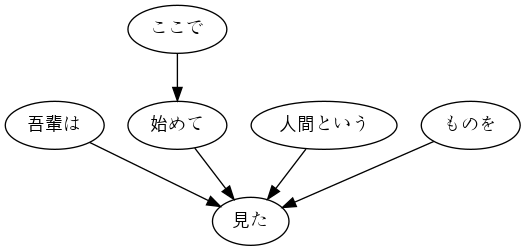

In [214]:
Image(g.create_png())